# N points in 2D

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

In [2]:
lbox=10

n_vertices = 6
max_module = 2.0

vertices = np.random.uniform(-lbox+max_module, lbox-max_module, (n_vertices, 2))
v_vertices = np.random.uniform(-1, 1, (n_vertices, 2))
v_vertices = max_module*v_vertices/np.linalg.norm(np.ravel(v_vertices))

In [3]:
n_points = 500
points = np.random.uniform(-10, 10, (n_points, 2))
v_points = np.zeros((n_points, 2))

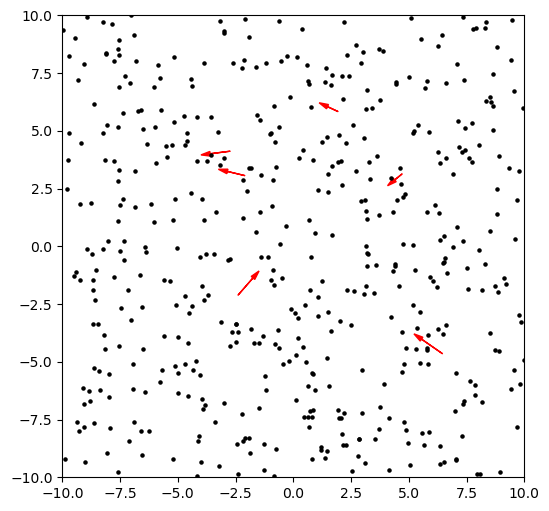

In [4]:
plt.rcParams["figure.figsize"] = (6,6)

ax=plt.gca()

for ii in range(n_vertices):
    plt.arrow(vertices[ii,0], vertices[ii,1], v_vertices[ii,0], v_vertices[ii,1],
              head_width=0.2, head_length=0.4, fc='r', ec='r')

plt.scatter(points[:,0], points[:,1], s=5, c='k')
    
plt.axis('scaled')
plt.xlim(-lbox, lbox)
plt.ylim(-lbox, lbox)

plt.show()

In [ ]:
delaunay = Delaunay(vertices)

In [ ]:
delaunay.simplices

In [ ]:
delaunay.points[delaunay.simplices].mean(axis=1)

In [ ]:
delaunay.points[delaunay.simplices[0]]

In [ ]:
delaunay.ndim

In [ ]:
def barycentric_coords3(vertices, point):
    T = (np.array(vertices[:-1])-vertices[-1]).T
    v = np.dot(la.inv(T), np.array(point)-vertices[-1])
    v.resize(len(vertices))
    v[-1] = 1-v.sum()
    return v

In [ ]:
def barycentric_coords2(vertices, point):
    v = vertices[1]-vertices[0]
    d = np.linalg.norm(v)
    u = v/d
    p = point - vertices[0]
    f = np.dot(p, u)/d
    return 1.0-f, f

In [ ]:
bcoords = np.zeros([n_points,3], dtype=float)

for ii in range(n_points):
    
    simplex = delaunay.find_simplex(points[ii])
    
    #alpha, beta, gamma = barycentric_coords3(vertices, points[ii])
    #all_bcoords3.append(np.array([alpha, beta, gamma]))

    #if (alpha<0):
    #    alpha = 0.0
    #    beta, gamma = barycentric_coords2([vertices[1], vertices[2]], points[ii])
    #    if beta<0:
    #        beta = 0.0
    #        gamma = 1.0
    #    elif beta>1:
    #        beta = 1.0
    #       gamma = 0.0
    #elif (beta<0):
    #    beta = 0.0
    #    alpha, gamma = barycentric_coords2([vertices[0], vertices[2]], points[ii])
    #    if alpha<0:
    #       alpha = 0.0
    #        gamma = 1.0
    #    elif alpha>1:
    #       alpha = 1.0
    #       gamma = 0.0
    #elif (gamma<0):
    #    gamma = 0.0
    #    alpha, beta = barycentric_coords2([vertices[0], vertices[1]], points[ii])
    #    if alpha<0:
    #        alpha = 0.0
    #       beta = 1.0
    #   elif alpha>1:
    #       alpha = 1.0
    #       beta = 0.0

    v_points[ii] = alpha*v_vertices[0]+beta*v_vertices[1]+gamma*v_vertices[2]

In [ ]:
plt.rcParams["figure.figsize"] = (6,6)

ax=plt.gca()

for ii in range(n_points):
    plt.arrow(points[ii,0], points[ii,1], v_points[ii,0], v_points[ii,1],
        head_width=0.2, head_length=0.4, fc='k', ec='k')
    
for ii in range(n_vertices):
    plt.arrow(vertices[ii,0], vertices[ii,1], v_vertices[ii,0], v_vertices[ii,1],
              head_width=0.2, head_length=0.4, fc='r', ec='r', lw=2.0)

    
plt.axis('scaled')
plt.xlim(-lbox, lbox)
plt.ylim(-lbox, lbox)

plt.show()